## 规划类

### 线性规划

#### scipy.optimize.linprog

In [31]:
#2维线性规划问题
from scipy.optimize import linprog
c=[1,-4]#默认取最小值，如果想要得到最大值，只需取反[-1,4]就能得到最大值的相反数
A=[[-3,1],[1,2]]
b=[6,4]
x0_bounds=(None,None)
x1_bounds=(-3,None)
res=linprog(c,A_ub=A,b_ub=b,bounds=(x0_bounds,x1_bounds),options={"disp":True})
print(res)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -11.428571428571429
              x: [-1.143e+00  2.571e+00]
            nit: 0
          lower:  residual: [       inf  5.571e+00]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-8.571e-01 -1.571e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0


#### PULP

![](picture/img.png)

In [32]:
import pulp

In [33]:
# 定义规划问题
MyProbLP = pulp.LpProblem("LPProbDemo1", sense=pulp.LpMaximize)

# 定义决策变量
x1 = pulp.LpVariable('x1', lowBound=0, upBound=7, cat='Continuous')
x2 = pulp.LpVariable('x2', lowBound=0, upBound=7, cat='Continuous')
x3 = pulp.LpVariable('x3', lowBound=0, upBound=7, cat='Continuous')

# 设置目标函数
MyProbLP += 2*x1 + 3*x2 - 5*x3

# 添加约束条件
MyProbLP += (2*x1 - 5*x2 + x3 >= 10)  # 不等式约束
MyProbLP += (x1 + 3*x2 + x3 <= 12)  # 不等式约束
MyProbLP += (x1 + x2 + x3 == 7)  # 等式约束

# 求解
MyProbLP.solve()
print("Status:", pulp.LpStatus[MyProbLP.status]) # 输出求解状态
for v in MyProbLP.variables():
    print(v.name, "=", v.varValue)  # 输出每个变量的最优值
print("F(x) = ", pulp.value(MyProbLP.objective))  #输出最优解的目标函数值



Status: Optimal
x1 = 6.4285714
x2 = 0.57142857
x3 = 0.0
F(x) =  14.57142851


##### 运输问题

![](picture/img_1.png)

In [34]:
import pulp
import numpy as np
from pprint import pprint

def transportation_problem(costs,x_max,y_max):
    row = len(costs)
    col = len(costs[0])
    prob = pulp.LpProblem('Transportation Problem',sense=pulp.LpMaximize)
    var = [[pulp.LpVariable(f'x{i}{j}',lowBound=0,cat=pulp.LpInteger) for j in range(col)] for i in range(row)]
    flatten = lambda x: [y for l in x for y in flatten(l)] if type(x) is list else [x]
    # LpDot 向量点乘
    prob += pulp.lpDot(flatten(var),costs.flatten())
    for i in range(row):
        prob += (pulp.lpSum(var[i])<=x_max[i])
    for j in range(col):
        prob += (pulp.lpSum(([var[i][j]] for i in range(row))) <=y_max[j])
        prob.solve()
        return {'objective':pulp.value(prob.objective),'var':[[pulp.value(var[i][j])for j in range(col)]for i in range(row)]}

if __name__ == '__main__':
    costs = np.array([[500,550,630,1000,800,700],
                      [800,700,600,950,900,930],
                      [1000,960,840,650,600,700],
                      [1200,1040,980,960,880,780]])
    max_plant = [76,88,96,40]
    max_cultivation = [42,56,44,39,60,59]
    res = transportation_problem(costs,max_plant,max_cultivation)
    print(f'最大值为(res["objective"])')
    print('各变量的值为：')
    pprint(res['var'])

最大值为(res["objective"])
各变量的值为：
[[0.0, 0.0, 0.0, 76.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 88.0, 0.0, 0.0],
 [2.0, 94.0, 0.0, 0.0, 0.0, 0.0],
 [40.0, 0.0, 0.0, 0.0, 0.0, 0.0]]


D:\Anaconda3\lib\site-packages\pulp\pulp.py:1199: UserWarning: Spaces are not permitted in the name. Converted to '_'
  warnings.warn("Spaces are not permitted in the name. Converted to '_'")


#### 整数规划

* 先去除整数约束
* 分支定界

##### pulp

In [9]:
from pulp import *

# 创建LpProblem对象，并指定类型：LpMaximize
my_MipProblem = LpProblem('test1', LpMaximize)

# 指明参数范围、类型，LpInterger代表整型
x1 = LpVariable('x1', lowBound=0, cat=LpInteger)
x2 = LpVariable('x2', lowBound=0, cat=LpInteger)

# 添加目标函数以及约束
my_MipProblem += 20 * x1 + 10 * x2, 'obj'
my_MipProblem += 5 * x1 + 4 * x2 <= 24, 'c1'
my_MipProblem += 2 * x1 + 5 * x2 <= 13, 'c2'



In [ ]:
# 返回状态，1代表成功
my_MipProblem.solve()

In [ ]:
my_MipProblem.status

In [ ]:
my_MipProblem.variables

In [ ]:
# 打印求解得到的参数值
for v in my_MipProblem.variables():
    print(v.varValue)

In [ ]:
my_MipProblem.objective

In [ ]:
# 打印求解得到的目标函数值
value(my_MipProblem.objective)

##### cvxpy

##### 1.整数线性规划

![](picture/img_2.png)

In [35]:
import cvxpy as cp
from numpy import array
c=array([40,90]) #定义目标向量
a=array([[9,7],[-7,-20]]) #定义约束矩阵
b=array([56,-70]) #定义约束条件的右边向量
x=cp.Variable(2,integer=True) #定义两个整数决策变量
obj=cp.Minimize(c*x) #构造目标函数
cons=[a*x<=b, x>=0] #构造约束条件
prob=cp.Problem(obj, cons) #构建问题模型
prob.solve(solver='GLPK_MI',verbose =True) #求解问题
print("最优值为:",prob.value)
print("最优解为：\n",x.value)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Aug 14 06:13:39 PM: Your problem has 2 variables, 2 constraints, and 0 parameters.
(CVXPY) Aug 14 06:13:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 14 06:13:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 14 06:13:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 14 06:13:39 PM: Compiling problem (target solver=GLPK_MI).
(CVXPY) Aug 14 06:13:39 PM: Reduction chain: Dcp2Cone -> CvxAttr2Constr -> ConeMatrixStuffing 

D:\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 1 times so far.

  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 2 times so far.

  warnings.warn(msg, UserWarning)


##### 2.指派问题

![](picture/img_3.png)

In [36]:
import cvxpy as cp
import numpy as np
c=np.array([[4, 8, 7, 15, 12],
[7, 9, 17, 14, 10],
[6, 9, 12, 8, 7],
[6, 7, 14, 6, 10],
[6, 9, 12, 10, 6]])
x = cp.Variable((5,5),integer=True)
obj = cp.Minimize(cp.sum(cp.multiply(c,x)))
con= [0 <= x, x <= 1, cp.sum(x, axis=0, keepdims=True)==1,
cp.sum(x, axis=1, keepdims=True)==1]
prob = cp.Problem(obj, con)
prob.solve(solver='GLPK_MI')
print("最优值为:",prob.value)
print("最优解为：\n",x.value)

最优值为: 34.0
最优解为：
 [[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]


##### 3.装箱问题

![](picture/img_4.png)

In [37]:
import cvxpy as cp
import numpy as np
L=np.array([48.7,52.0,61.3,72.0,48.7,52.0,64.0])
w=np.array([2000,3000,1000,500,4000,2000,1000])
a=np.array([8,7,9,6,6,4,8])
x=cp.Variable((2,7), integer=True)
obj=cp.Maximize(cp.sum(x*L))
con=[cp.sum(x,axis=0,keepdims=True)<=a.reshape(1,7),
x*L<=1020, x*w<=40000, cp.sum(x[:,4:]*L[4:])<=302.7, x>=0]
prob = cp.Problem(obj, con)
prob.solve(solver='GLPK_MI',verbose =True)
print("最优值为:",prob.value)
print("最优解为：\n",x.value)

                                     CVXPY                                     
                                     v1.3.2                                    
(CVXPY) Aug 14 06:13:39 PM: Your problem has 14 variables, 5 constraints, and 0 parameters.
(CVXPY) Aug 14 06:13:39 PM: It is compliant with the following grammars: DCP, DQCP
(CVXPY) Aug 14 06:13:39 PM: (If you need to solve this problem multiple times, but with different data, consider using parameters.)
(CVXPY) Aug 14 06:13:39 PM: CVXPY will first compile your problem; then, it will invoke a numerical solver to obtain a solution.
-------------------------------------------------------------------------------
                                  Compilation                                  
-------------------------------------------------------------------------------
(CVXPY) Aug 14 06:13:39 PM: Compiling problem (target solver=GLPK_MI).
(CVXPY) Aug 14 06:13:39 PM: Reduction chain: FlipObjective -> Dcp2Cone -> CvxAttr2Constr -> C

D:\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 3 times so far.

  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\cvxpy\expressions\expression.py:612: UserWarning: 
This use of ``*`` has resulted in matrix multiplication.
Using ``*`` for matrix multiplication has been deprecated since CVXPY 1.1.
    Use ``*`` for matrix-scalar and vector-scalar multiplication.
    Use ``@`` for matrix-matrix and matrix-vector multiplication.
    Use ``multiply`` for elementwise multiplication.
This code path has been hit 4 times so far.

  warnings.warn(msg, UserWarning)
D:\Anaconda3\lib\site-packages\cvxpy\express

-------------------------------------------------------------------------------
                                    Summary                                    
-------------------------------------------------------------------------------
(CVXPY) Aug 14 06:13:40 PM: Problem status: optimal
(CVXPY) Aug 14 06:13:40 PM: Optimal value: 2.039e+03
(CVXPY) Aug 14 06:13:40 PM: Compilation took 1.307e-02 seconds
(CVXPY) Aug 14 06:13:40 PM: Solver (including time spent in interface) took 8.572e-01 seconds
最优值为: 2039.4
最优解为：
 [[4. 1. 5. 3. 3. 2. 0.]
 [4. 6. 4. 3. 0. 1. 0.]]


### 非线性规划

In [ ]:
import numpy as np
from scipy.optimize import minimize

# 定义目标函数
def func1(x, sign=-1):
    return sign*(x[0]**2 + x[1]**2 - x[0]*x[1] - 2*x[0] - 5*x[1])
# 定义约束，ineq代表不等式约束
cons = ({'type': 'ineq',
         'fun': lambda x: -(x[0]-1)**2 + x[1]},
        {'type': 'ineq',
         'fun': lambda x: 2*x[0] - 3*x[1] + 6})
# 设定初始值
x0 = [0, 0]
res = minimize(func1, x0, constraints=cons, method='SLSQP')
print(res.x)
print(-res.fun)



In [ ]:
def func2(x, args=8):
    return x[0]**2 + x[1]**2 + x[2]**2 + args

cons = ({'type':'ineq', 'fun': lambda x: x[0]**2 - x[1] + x[2]**2},
        {'type':'ineq', 'fun': lambda x: -(x[0] + x[1]**2 + x[2]**2) + 20},
        {'type':'eq', 'fun': lambda x: x[0] + x[1]**2 - 2},
        {'type':'eq', 'fun': lambda x: x[1] + 2*x[2]**2 - 3})
# 设定参数上下界
bounds = ((0, None), (0, None), (0, None))
x0 = [0, 0, 0]
res = minimize(func2, x0, bounds=bounds, constraints=cons, method='SLSQP')
print(res.x)
print(res.fun)

In [ ]:
a = [1,4,3,5,9,12,6,20,17,8]
b = [2,10,8,18,1,4,5,10,8,9]
FUNC = list(range(10))

In [ ]:
def func(x):
    for i in range(10):
        FUNC[i] = abs(x[0]-a[i]) + abs(x[1]-b[i])
    return max(FUNC)

In [ ]:
bounds = [(3,8), (4,10)]
x0 = [6, 6]
res = minimize(func, x0, bounds=bounds, method="SLSQP")
print(res.x)
print(res.fun)

## 回归分析

### 线性回归

#### P2P网贷实例

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('raw_data.csv')
data.head()

,SUCCESS,DEFAULT,AMOUNT,INTEREST,MONTHS,CREDIT,BIDS,HOUSE,CAR,Year,EDUCATION,WORKTIME,INCOME,IND,CITY,MARRY,ADDRESS,AGE
0,0,0,3000,15.0,3,1,1,1,0,2011,2,1,5,能源业,上海,未婚,上海,27
1,0,0,3000,15.0,6,1,0,0,0,2011,2,1,2,制造业,深圳,未婚,广东,32
2,0,0,3000,20.0,3,1,0,0,0,2011,2,2,4,建筑工程,苏州,未婚,江苏,32
3,0,0,3000,20.4,3,1,0,0,0,2011,1,2,3,IT,邯郸,已婚,河北,29
4,0,0,7000,15.0,6,5,14,0,0,2011,2,1,3,制造业,杭州,已婚,浙江,31


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128573 entries, 0 to 128572
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   SUCCESS    128573 non-null  int64  
 1   DEFAULT    128573 non-null  int64  
 2   AMOUNT     128573 non-null  int64  
 3   INTEREST   128573 non-null  float64
 4   MONTHS     128573 non-null  int64  
 5   CREDIT     128573 non-null  int64  
 6   BIDS       128573 non-null  int64  
 7   HOUSE      128573 non-null  int64  
 8   CAR        128573 non-null  int64  
 9   Year       128573 non-null  int64  
 10  EDUCATION  128573 non-null  int64  
 11  WORKTIME   128573 non-null  int64  
 12  INCOME     128573 non-null  int64  
 13  IND        128573 non-null  object 
 14  CITY       128573 non-null  object 
 15  MARRY      128573 non-null  object 
 16  ADDRESS    128573 non-null  object 
 17  AGE        128573 non-null  int64  
dtypes: float64(1), int64(13), object(4)
memory usage: 17.7+ MB


In [4]:
data.drop(data[data['ADDRESS'].map(lambda x : x == '香港' or x == '台湾' or x == '澳门')].index, inplace=True)

In [5]:
data.describe()

,SUCCESS,DEFAULT,AMOUNT,INTEREST,MONTHS,CREDIT,BIDS,HOUSE,CAR,Year,EDUCATION,WORKTIME,INCOME,AGE
count,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000,128532.000000
mean,0.070309,0.005594,58751.692964,16.032722,12.296105,1.190482,3.411119,0.411213,0.235786,2012.740111,1.800073,2.394602,3.904125,32.373821
std,0.255669,0.074583,111021.210662,3.920587,7.951234,0.815687,21.509059,0.492056,0.424490,1.005786,0.793808,1.008723,1.263114,6.763847
min,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2011.000000,1.000000,1.000000,1.000000,3.000000
25%,0.000000,0.000000,5000.000000,15.000000,6.000000,1.000000,0.000000,0.000000,0.000000,2012.000000,1.000000,2.000000,3.000000,28.000000
50%,0.000000,0.000000,20000.000000,15.000000,12.000000,1.000000,0.000000,0.000000,0.000000,2013.000000,2.000000,2.000000,4.000000,31.000000
75%,0.000000,0.000000,50000.000000,19.000000,24.000000,1.000000,0.000000,1.000000,0.000000,2014.000000,2.000000,3.000000,4.000000,35.000000
max,1.000000,1.000000,1000000.000000,24.400000,36.000000,7.000000,747.000000,1.000000,1.000000,2014.000000,4.000000,4.000000,7.000000,116.000000


In [6]:
data1 = data.groupby('ADDRESS').agg({'SUCCESS':['count', 'sum'], 'DEFAULT':'sum'})
data1.head(2)

SUCCESS      DEFAULT
          count  sum     sum
ADDRESS                     
上海         4305  286      20
云南         2560  181      14

In [7]:
data1.insert(2, '成功率', data1['SUCCESS']['sum']/data1['SUCCESS']['count'])
data1.insert(4, '违约率', data1['DEFAULT']['sum']/data1['SUCCESS']['sum'])
data1.head(2)

SUCCESS            成功率 DEFAULT       违约率
          count  sum               sum          
ADDRESS                                         
上海         4305  286  0.066434      20  0.069930
云南         2560  181  0.070703      14  0.077348

In [8]:
data2 = data1[['成功率','违约率']]
data2

,成功率,违约率
,,
ADDRESS,,
上海,0.066434,0.069930
云南,0.070703,0.077348
内蒙古,0.034043,0.062500
北京,0.086044,0.013187
吉林,0.073999,0.082192
四川,0.045325,0.081181
天津,0.058777,0.108108
宁夏,0.035256,0.136364


In [9]:
data2 = data2.sort_values('成功率')

In [10]:
# 支持显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False


In [11]:
n = len(data2.index)
mean = data2['违约率'].mean()

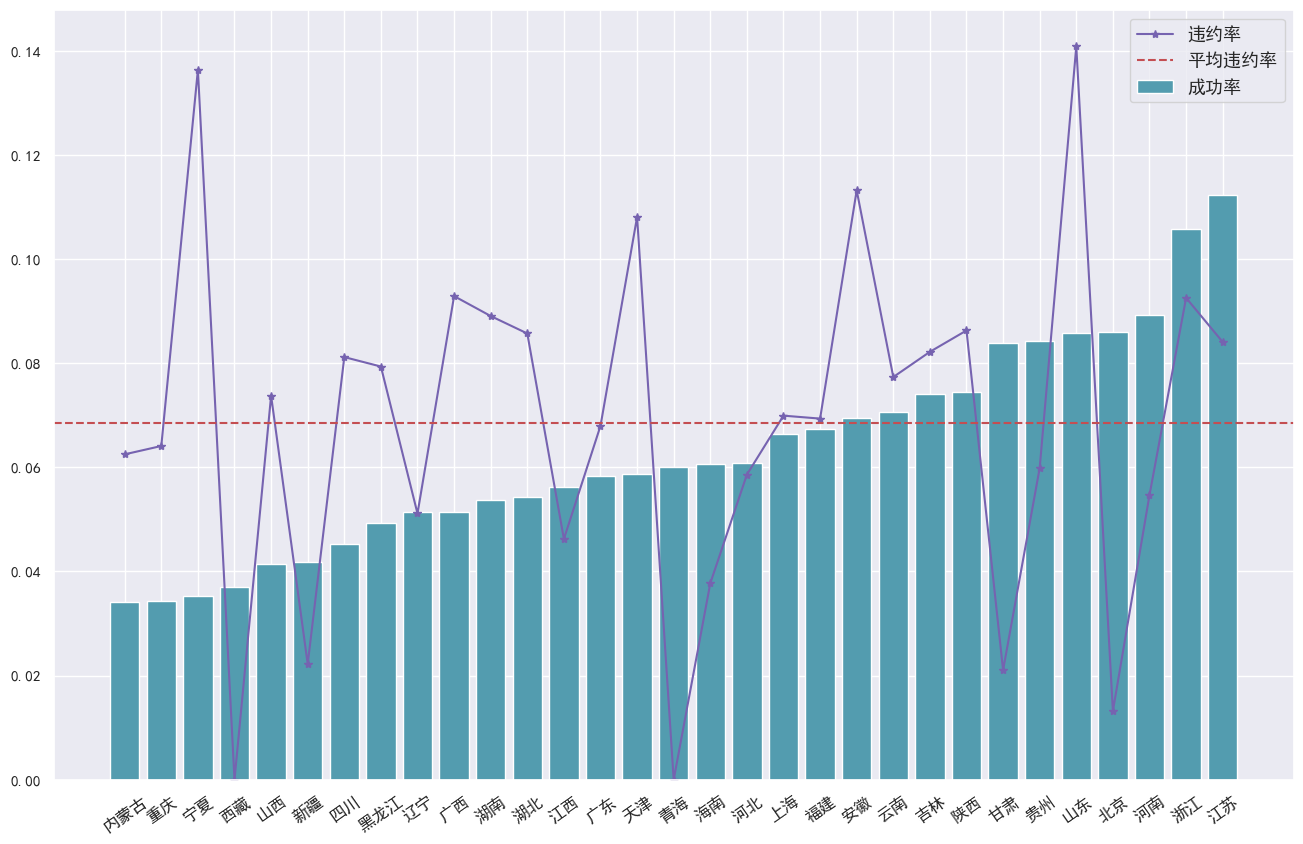

In [12]:
sns.set(font="SimHei")
plt.figure(figsize=(16,10))
plt.bar(data2.index, data2['成功率'], color='#539CAF', label='成功率')
plt.plot(data2.index, data2['违约率'], color='#7663B0', label='违约率', marker='*')
plt.axhline(y=mean, color='r', linestyle='--', label='平均违约率')
plt.legend(loc='best',fontsize=13)
plt.xticks(rotation=35,fontsize=12)
plt.show()

<Axes: xlabel='AGE', ylabel='Density'>

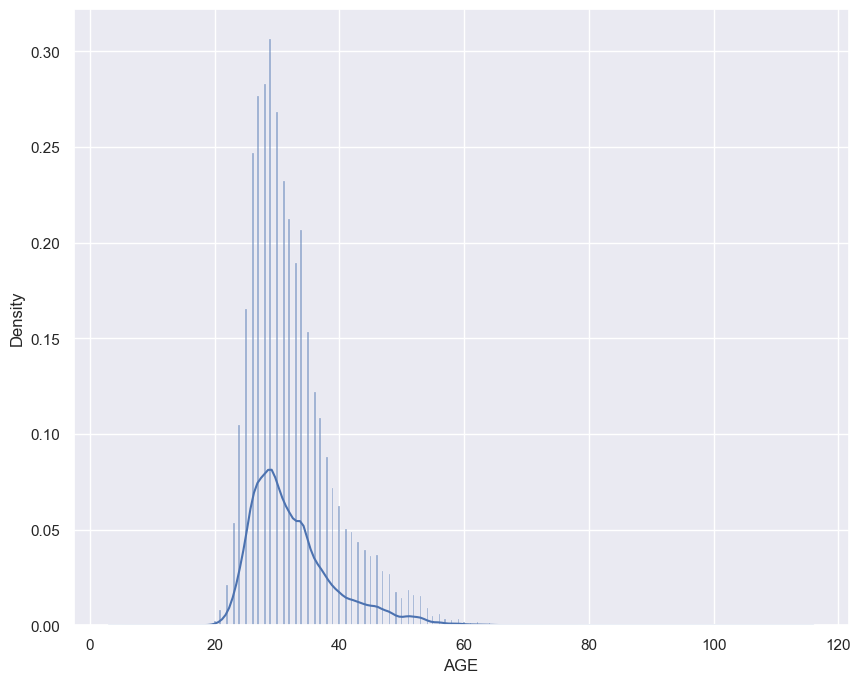

In [24]:
sns.set()
plt.figure(figsize=(10,8))
sns.histplot(data.AGE,kde=True,stat='density',kde_kws=dict(cut=0))

### 拟合

#### 多项式拟合

In [56]:
#最小二乘多项式曲线拟合
import numpy as np
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
z = np.polyfit(x, y, 30)#得到一条最高次幂为30的拟合曲线，如结果所示，第一个数值-7.16028404e-22为30次幂的系数，以此类推。
print(z)
#给31个数加上次数
p30=np.poly1d(np.polyfit(x,y,30))
print(p30(4))#当x=4时，此时y的值

[-7.16028404e-22 -3.53244996e-21 -1.73643682e-20 -8.49616988e-20
 -4.13196126e-19 -1.99351629e-18 -9.51562313e-18 -4.47612634e-17
 -2.06266909e-16 -9.22264291e-16 -3.93423954e-15 -1.54779639e-14
 -5.15043682e-14 -9.84336459e-14  4.79579339e-13  8.28266124e-12
  7.66157327e-11  5.89919299e-10  4.13252699e-09  2.71435971e-08
  1.68688753e-07  9.87879705e-07  5.34617723e-06  2.53921341e-05
  8.97230082e-05  2.24930460e-05 -3.51987939e-03 -3.95749282e-02
 -2.12411048e-01  1.05536171e+00  1.31441529e-15]
-0.800000000000002


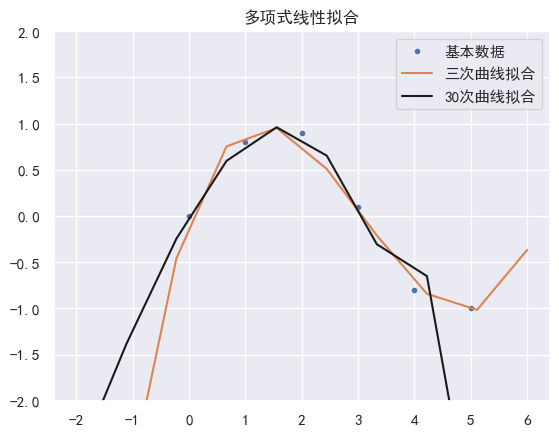

In [57]:
#多项式拟合包括3次和30次
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
#生成基本数据x，y
x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
xp=np.linspace(-2,6,10)
p=np.poly1d(np.polyfit(x,y,3))#最高次幂为3次
p30=np.poly1d(np.polyfit(x,y,30))#最高次幂为30次
plt.ylim(-2,2)
plt.title("多项式线性拟合")
plt.plot(x,y,'.',xp,p(xp),'-',xp,p30(xp),'k-')
plt.legend(loc="best",labels=["基本数据","三次曲线拟合","30次曲线拟合"])#分别对应的加上了legend
plt.show()

#### 插值

##### Hermite插值

In [ ]:
from scipy.interpolate import KroghInterpolator as ki
import numpy as np
import matplotlib.pyplot as plt

import scienceplots

In [ ]:
plt.style.use('science')
np.set_printoptions(suppress=True)  # 不适用科学计数法

In [ ]:
x = np.linspace(-np.pi,np.pi, 7, endpoint=True)  # 在[-Π,Π]上生成7个数，包含Π
y = np.sin(x)
new_x = np.array(np.arange(min(x),max(x),0.1))  # 从[-Π,Π]上每隔0.1取一个数，作为待插坐标
interpolant = ki(x, y)  #构造Hermite方法
sin_x = np.array(np.arange(-np.pi,np.pi,0.01))  # 用于绘制三角函数sin

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(new_x, interpolant(new_x), '--',label='Hermite Interpolation')  # 绘制Hermite插值图
plt.scatter(x, np.sin(x),  label='Sample point')  # 原始样本点
plt.plot(sin_x, np.sin(sin_x),  label='sin(x)')  # 绘制三角函数图sin
plt.legend(fontsize=13)  # 显示图例

##### 拉格朗日

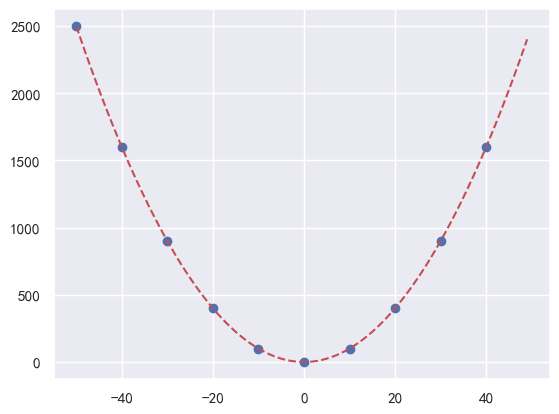

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import lagrange
sr_x = [i for i in range(-50, 50, 10)]
sr_fx = [i**2 for i in sr_x]

Lx = lagrange(sr_x, sr_fx)            # 获得插值函数
tmp_x = [i for i in range(-50, 50)]     # 测试用例
tmp_y = [Lx(i) for i in tmp_x]          # 根据插值函数获得测试用例的纵坐标

''' 画图 '''
plt.figure("play")
ax1 = plt.subplot(111)
plt.sca(ax1)
plt.plot(sr_x, sr_fx, linestyle = ' ', marker='o', color='b')
plt.plot(tmp_x, tmp_y, linestyle = '--', color='r')
plt.show()
#tmp_y

###### 填充数据

In [54]:
# 缺少数据
#coding=utf-8
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from scipy.interpolate import lagrange#拉格朗日函数
data=pd.read_excel('./数学建模/源数据/data.xls')
# data=data.reset_index(drop=True)
print(data)
#自定义列向量插值函数
def ploy(s,n,k=6):
    y=s[list(range(n-k,n))+list(range(n+1,n+1+k))]#取数
    y=y[y.notnull()]
    return lagrange(y.index,list(y))(n)
for i in data.columns:
    for j in range(len(data)):
        if(data[i].isnull())[j]:
            data[i][j]=ploy(data[i],j)
print(data)

FileNotFoundError: [Errno 2] No such file or directory: './数学建模/源数据/data.xls'

##### 二维插值（三维展示）

In [ ]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
%matplotlib inline
from scipy import interpolate
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def func(x, y):
    return (x+y)*np.exp(-5.0*(x**2 + y**2))

# X-Y轴分为20*20的网格
x = np.linspace(-1, 1, 20)
y = np.linspace(-1,1,20)
x, y = np.meshgrid(x, y)#20*20的网格数据

fvals = func(x,y) # 计算每个网格点上的函数值  15*15的值

fig = plt.figure(figsize=(9, 6))
#Draw sub-graph1
ax=plt.subplot(1, 2, 1,projection = '3d')
surf = ax.plot_surface(x, y, fvals, rstride=2, cstride=2, cmap='coolwarm',linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注

#二维插值
newfunc = interpolate.interp2d(x, y, fvals, kind='cubic')#newfunc为一个函数




# 计算100*100的网格上的插值
xnew = np.linspace(-1,1,100)#x
ynew = np.linspace(-1,1,100)#y
fnew = newfunc(xnew, ynew)#仅仅是y值   100*100的值  np.shape(fnew) is 100*100
xnew, ynew = np.meshgrid(xnew, ynew)
ax2=plt.subplot(1, 2, 2,projection = '3d')
surf2 = ax2.plot_surface(xnew, ynew, fnew, rstride=2, cstride=2, cmap=plt.colormaps['coolwarm'],linewidth=0.5, antialiased=True)
ax2.set_xlabel('xnew')
ax2.set_ylabel('ynew')
ax2.set_zlabel('fnew(x, y)')
plt.colorbar(surf2, shrink=0.5, aspect=5)#标注

plt.show()

##### 三次样条插值

In [1]:
import scipy.interpolate
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

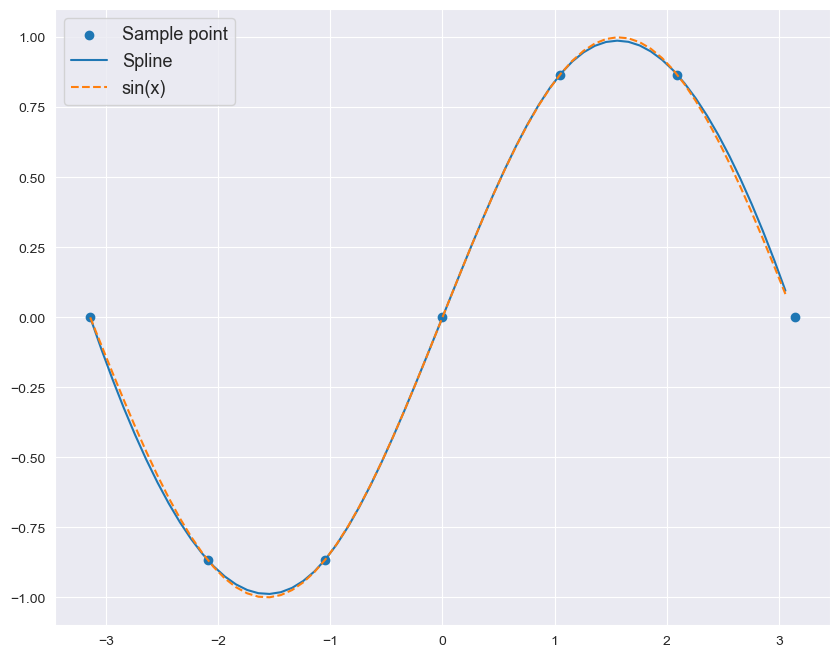

In [2]:
x = np.linspace(-np.pi,np.pi, 7, endpoint=True)
y = np.sin(x)
xx = np.arange(min(x), max(x), 0.1)
_, ax = plt.subplots(figsize=(10,8))
ax.scatter(x, y, label='Sample point')
spline = interp1d(x, y, kind='cubic')  # cubic：三次样条插值，更多方法见http://liao.cpython.org/scipy15/
ax.plot(xx, spline(xx), label='Spline')
ax.plot(xx, np.sin(xx),'--',label='sin(x)')
plt.legend(fontsize=13,loc='best')

##### 示例

需要 terrain.csv

In [ ]:
import math
from typing import Union

import pyecharts.options as opts
from pyecharts.charts import Surface3D,Scatter3D

"""
Gallery 使用 pyecharts 1.1.0
参考地址: https://echarts.baidu.com/examples/editor.html?c=surface-wave&gl=1

目前无法实现的功能:

1、暂时无法设置光滑表面 wireframe
2、暂时无法把 visualmap 进行隐藏
"""


def float_range(start: int, end: int, step: Union[int, float], round_number: int = 2):
    """
    浮点数 range
    :param start: 起始值
    :param end: 结束值
    :param step: 步长
    :param round_number: 精度
    :return: 返回一个 list
    """
    temp = []
    while True:
        if start < end:
            temp.append(round(start, round_number))
            start += step
        else:
            break
    return temp


def surface3d_data():
    for t0 in float_range(-3, 3, 0.05):
        y = t0
        for t1 in float_range(-3, 3, 0.05):
            x = t1
            z = math.sin(x ** 2 + y ** 2) * x / 3.14
            yield [x, y, z]


a = surface3d_data()

from scipy.interpolate import interp2d
import numpy as np
import pandas as pd

temp = pd.read_csv('terrain.csv')
temp



,0,1,2,3,4,5,6,7
0,1480,1500,1550,1510,1430,1300,1200,980
1,1500,1550,1600,1550,1600,1600,1600,1550
2,1500,1200,1100,1550,1600,1550,1380,1070
3,1500,1200,1100,1350,1450,1200,1150,1010
4,1390,1500,1500,1400,900,1100,1060,950
5,1320,1450,1420,1400,1300,700,900,850
6,1130,1250,1280,1230,1040,900,500,700


In [7]:
x = np.array([1200,1600,2000,2400,2800,3200,3600,4000])
y = np.array([3600,3200,2800,2400,2000,1600,1200])
z = np.array(temp)


interpreter = interp2d(x,y,z,kind='cubic')

X = np.linspace(1200,4000,num=120,endpoint=True)
Y = np.linspace(1200,3600,num=100,endpoint=True)
Z = interpreter(X,Y)


data_list = []
for i in range(100):
    for j in range(120):
        data_list.append([X[j],Y[i],Z[i,j]])

from pyecharts.globals import CurrentConfig, NotebookType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

surface3d = (
    Surface3D()
    .add(
        series_name="",
        shading="color",
        data=data_list,
        grid3d_opts=opts.Grid3DOpts(width=100, height=40, depth=100),
    )
    .set_global_opts(
        visualmap_opts=opts.VisualMapOpts(
            dimension=2,
            max_=1800,
            min_=400,
            range_color=[
                "#313695",
                "#4575b4",
                "#74add1",
                "#abd9e9",
                "#e0f3f8",
                "#ffffbf",
                "#fee090",
                "#fdae61",
                "#f46d43",
                "#d73027",
                "#a50026",
            ],
        )
    )
)

surface3d.load_javascript()

C:\Users\15032\AppData\Local\Temp\ipykernel_20952\3990473221.py:6: DeprecationWarning: `interp2d` is deprecated!
`interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

For legacy code, nearly bug-for-bug compatible replacements are
`RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
scattered 2D data.

In new code, for regular grids use `RegularGridInterpolator` instead.
For scattered data, prefer `LinearNDInterpolator` or
`CloughTocher2DInterpolator`.

For more details see
`https://gist.github.com/ev-br/8544371b40f414b7eaf3fe6217209bff`

  interpreter = interp2d(x,y,z,kind='cubic')
C:\Users\15032\AppData\Local\Temp\ipykernel_20952\3990473221.py:10: DeprecationWarning:         `interp2d` is deprecated!
        `interp2d` is deprecated in SciPy 1.10 and will be removed in SciPy 1.12.0.

        For legacy code, nearly bug-for-bug compatible replacements are
        `RectBivariateSpline` on regular grids, and `bisplrep`/`bisplev` for
        scatter

In [8]:
surface3d.render_notebook()

### 回归预测

In [ ]:
# 缺少数据
import warnings
warnings.filterwarnings("ignore")
from sklearn import neural_network
from sklearn.svm import SVR
from sklearn.tree import ExtraTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,scale
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import BaggingRegressor,GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from scipy.interpolate import make_interp_spline
from sklearn.metrics import mean_squared_error,r2_score,explained_variance_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']
mpl.rcParams['axes.unicode_minus'] = False
%matplotlib inline
fig = plt.gcf()
fig.set_size_inches(8,7)#设置图例大小
data=pd.read_excel("./数学建模/源数据/data.xls",index_col=0)
data=pd.DataFrame(scale(data))#标准化
i=5#前五项训练
X_train=data.iloc[:i,:-1]
Y_train=data.iloc[:i,-1]
X_test=data.iloc[i:,:-1]
Y_test=data.iloc[i:,-1]
MLP=neural_network.MLPRegressor()
svm=SVR(kernel='linear')
tree=ExtraTreeRegressor()
bagging=BaggingRegressor()
GDBT=GradientBoostingRegressor()
RF=RandomForestRegressor()
AdaBoost=AdaBoostRegressor()
LR=LinearRegression()
PLS=PLSRegression(scale=True)#最小偏二乘回归，保留2个主成分
T = np.array([6, 7, 8, 9, 10])
xnew = np.linspace(T.min(),T.max(),300)

ax = plt.gca()
ax.spines['right'].set_color('none')#消去右边和顶部的实线
ax.spines['top'].set_color('none')

MLP.fit(X_train,Y_train)
y_pred=MLP.predict(X_test)
power_smooth = make_interp_spline(T,y_pred,xnew)
plt.plot(xnew,power_smooth,'r-',label="BP神经网络")
plt.plot(T,y_pred,"rp")

svm.fit(X_train,Y_train)
y_pred1=svm.predict(X_test)
power_smooth = make_interp_spline(T,y_pred1,xnew)
plt.plot(xnew,power_smooth,'y-',label="高斯核支持向量机")
plt.plot(T,y_pred1,"yD")

tree.fit(X_train,Y_train)
y_pred2=tree.predict(X_test)
power_smooth = make_interp_spline(T,y_pred2,xnew)
plt.plot(xnew,power_smooth,'b-',label="决策树")
plt.plot(T,y_pred2,"b+")

bagging.fit(X_train,Y_train)
y_pred3=bagging.predict(X_test)
power_smooth = make_interp_spline(T,y_pred3,xnew)
plt.plot(xnew,power_smooth,'c-',label="bagging")
plt.plot(T,y_pred3,"cH")

GDBT.fit(X_train,Y_train)
y_pred4=GDBT.predict(X_test)
power_smooth = make_interp_spline(T,y_pred4,xnew)
plt.plot(xnew,power_smooth,'m-',label="GDBT")
plt.plot(T,y_pred4,"mH")

# RF.fit(X_train,Y_train)
# y_pred5=RF.predict(X_test)
# power_smooth = spline(T,y_pred5,xnew)
# plt.plot(xnew,power_smooth,'c-',label="随机森林")
# plt.plot(T,y_pred5,"cH")

# AdaBoost.fit(X_train,Y_train)
# y_pred6=AdaBoost.predict(X_test)
# power_smooth = spline(T,y_pred6,xnew)
# plt.plot(xnew,power_smooth,'c-',label="AdaBoost")
# plt.plot(T,y_pred6,"cH")

PLS.fit(X_train,Y_train)
y_pred_n=PLS.predict(X_test)
power_smooth = make_interp_spline(T,y_pred_n,xnew)
plt.plot(xnew,power_smooth/100,'m-',label="最小偏二乘回归")
plt.plot(T,y_pred_n/100,"mH")

LR.fit(X_train,Y_train)
y_pred7=LR.predict(X_test)
power_smooth = make_interp_spline(T,y_pred7,xnew)
plt.plot(xnew,power_smooth,'b-',label="线性回归")
plt.plot(T,y_pred7,"b*")

quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quadratic1 = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic1 = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic1, Y_train)
y_pred8=regressor_quadratic.predict(X_test_quadratic1)
power_smooth = make_interp_spline(T,y_pred8,xnew)
plt.plot(xnew,power_smooth,'g-',label="2次曲线拟合回归")
plt.plot(T,y_pred8,"gh")

quadratic_featurizer = PolynomialFeatures(degree=3)
X_train_quadratic = quadratic_featurizer.fit_transform(X_train)
X_test_quadratic = quadratic_featurizer.transform(X_test)
regressor_quadratic = LinearRegression()
regressor_quadratic.fit(X_train_quadratic, Y_train)
y_pred9=regressor_quadratic.predict(X_test_quadratic)
power_smooth = make_interp_spline(T,y_pred9,xnew)
plt.plot(xnew,power_smooth,'g-',label="3次曲线拟合回归")
plt.plot(T,y_pred9,"gh")

power_smooth = make_interp_spline(T,(y_pred+y_pred1+y_pred2+y_pred3+y_pred4+y_pred7+y_pred8+y_pred9)/9,xnew)
plt.plot(xnew,power_smooth,'k--',label="平均值")
plt.plot(T,(y_pred+y_pred1+y_pred2+y_pred3+y_pred4+y_pred7+y_pred8+y_pred9)/9,"gh")

plt.title("预测")
plt.plot(T,Y_test,'k.',label="真实值")
# plt.legend(loc="best",bbox_to_anchor=(1,1),fancybox=True,shadow=True)
plt.legend(loc="best",fancybox=True,shadow=True)
plt.savefig("f:/desktop/预测.jpeg",dpi=1000)#一定要放在plt.show()的前面，不然会一面空白
plt.show()
print('R2' ,r2_score(Y_test,y_pred1))
print('均方误差（MSE） ' ,mean_squared_error(Y_test,y_pred1))
print('可解释性方差 ' ,explained_variance_score(Y_test,y_pred1))

## 图论

In [ ]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
# creat a graph
G=nx.Graph()#Right now G is empty

In [ ]:
# Add a node

G.add_node(1)

G.add_nodes_from([2,3])# You can also add a list of nodes by passing a list argument

In [ ]:
# Add edges
G.add_edge(1,2)
nx.draw_networkx(G)

In [ ]:
e=(2,3)

G.add_edge(*e)# *unpacks the tuple

G.add_edges_from([(1,2),(1,3)]) # Just like nodes we can add edges from a list


In [ ]:
# 生成图
import matplotlib.pyplot as plt
import networkx as nx
H = nx.path_graph(10)
G=nx.Graph()
G.add_nodes_from(H)
nx.draw_networkx(G, with_labels=True)
plt.show()

#添加边
G=nx.Graph()

G.add_edges_from([(1,2),(1,3),(2,4),(2,5),(3,6),(4,8),(5,8),(3,7)])
nx.draw_networkx(G,with_labels=True,edge_color='b',node_color='g',node_size=1000)
plt.show()

# 加入权重
import random
G = nx.gnp_random_graph(10,0.3)
for u,v,d in G.edges(data=True):
    d['weight'] = random.random()

edges,weights = zip(*nx.get_edge_attributes(G,'weight').items())

pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, node_color='b', edgelist=edges, edge_color=weights, width=10.0, edge_cmap=plt.colormaps['Blues'])
# plt.savefig('edges.png')
plt.show()


#### 无向图

In [ ]:
# 节点名称
# nodes = [0,1,2,3,4,5,6,7,8]
# 边列表，格式为：（节点，节点，权重）
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10)]
# 创建Graph对象
G = nx.Graph()
# 添加节点
# G.add_nodes_from(nodes)
# 添加带权重的边
G.add_weighted_edges_from(edgess)
# 绘图并设置各种参数
nx.draw_networkx(G, node_color='b', font_color='w', font_weight='bold')
plt.show()

#### 有向图

In [ ]:
# 节点名称
# nodes = [0,1,2,3,4,5,6,7,8]
# 边列表，格式为：（节点，节点，权重）
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10),(4,5,6)]
# 创建Graph对象
G = nx.DiGraph()
# 添加节点
# G.add_nodes_from(nodes)
# 添加带权重的边
G.add_weighted_edges_from(edgess)
# 绘图并设置各种参数
nx.draw_networkx(G, node_color='b', font_color='w', font_weight='bold')
plt.show()

#### 带权图

In [ ]:
# sns.set(style='white')

# 节点名称
nodes = [0,1,2,3,4,5,6,7,8]
# 边列表，格式为：（节点，节点，权重）
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10)]
# 创建Graph对象
G = nx.Graph()
# 添加节点
G.add_nodes_from(nodes)
# 添加带权重的边
G.add_weighted_edges_from(edgess)
# 获取节点位置信息
pos=nx.spring_layout(G)
print(pos)
# 获取标签信息
labels = nx.get_edge_attributes(G,'weight')

# 绘图并设置各种参数
# 添加节点
nx.draw_networkx_nodes(G, pos,node_color='b')
# 添加边
nx.draw_networkx_edges(G, pos, width=3)
# 添加节点标号
nx.draw_networkx_labels(G, pos, font_size=12, font_color='w')
# 绘制带权边
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_size=15)
plt.show()

#### 画五角星

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.Graph()
G.add_node(1)
G.add_nodes_from([2,3,4,5])
for i in range(5):
    for j in range(i):
        if(abs(i-j) not in (1,4)):
            G.add_edge(i+1,j+1)
nx.draw_networkx(G,
                 with_labels=True,
                 edge_color='b',
                 pos=nx.circular_layout(G),
                  # 这个是选项选择点的排列方式，具体可以用 help(nx.drawing.layout) 查看
     # 主要有spring_layout  (default), random_layout, circle_layout, shell_layout
     # 这里是环形排布，还有随机排列等其他方式
                 node_color='r',
                 node_size=1000,
                 width=3#边的宽度
                 )
plt.show()

#### 多层感知机

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
left, right, bottom, top, layer_sizes = .1, .9, .1, .9, [4, 7, 7, 2]
# 网络离上下左右的距离
# layter_sizes可以自己调整
import random
G = nx.Graph()
v_spacing = (top - bottom)/float(max(layer_sizes))
h_spacing = (right - left)/float(len(layer_sizes) - 1)
node_count = 0
for i, v in enumerate(layer_sizes):
    layer_top = v_spacing*(v-1)/2. + (top + bottom)/2.
    for j in range(v):
        G.add_node(node_count, pos=(left + i*h_spacing, layer_top - j*v_spacing))
        node_count += 1
# 这上面的数字调整我想了好半天，汗
for x, (left_nodes, right_nodes) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
    for i in range(left_nodes):
        for j in range(right_nodes):
            G.add_edge(i+sum(layer_sizes[:x]), j+sum(layer_sizes[:x+1]))
# 慢慢研究吧
pos=nx.get_node_attributes(G,'pos')
# 把每个节点中的位置pos信息导出来
nx.draw_networkx(G, pos,
        node_color=range(node_count),
        with_labels=True,
        node_size=200,
        edge_color=[random.random() for i in range(len(G.edges))],
        width=3,
        cmap=plt.colormaps['Dark2'], # matplotlib的调色板，可以搜搜，很多颜色呢
        edge_cmap=plt.colormaps['Blues']
       )
plt.show()

#### 最短路径

##### 生成无向图

In [ ]:
# 节点名称
# nodes = [0,1,2,3,4,5,6,7,8]
# 边列表，格式为：（节点，节点，权重）
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10)]
# 创建Graph对象
G = nx.Graph()
# 添加节点
# G.add_nodes_from(nodes)
# 添加带权重的边
G.add_weighted_edges_from(edgess)
# 绘图并设置各种参数
nx.draw_networkx(G, node_color='b', font_color='w', font_weight='bold')
plt.show()

##### 0-4间最短路径

In [ ]:
# method参数默认为'dijkstra'，当边有向时，可以选择'bellman-ford'
# 不指定source时返回任意两点间最短路
p = nx.shortest_path(G, source=0, weight='weight', method='dijkstra')
print('0到4的最短路径为:',p[4])
d = nx.shortest_path_length(G, source=0, target=4, weight='weight')
print('0到4的最短距离为:',d)

###### 方法二

In [ ]:
# 第二个参数为'4'时，返回各个节点到'4'的最短路径
path=nx.single_source_dijkstra_path(G, 4, weight='weight')

# 第二个参数为'4'时，返回各个节点到'4'的最短路径的距离
length=nx.single_source_dijkstra_path_length(G, 4, weight='weight')


print(path)
print('----------------------------------------------------')
print(length)

##### 高亮最短距离

In [ ]:
Y = nx.Graph()
edgess = [(0,1,3), (0,7,8), (1,7,3), (1,2,8), (7,8,1), (7,6,6), (8,2,2),
         (8,6,6), (2,5,4), (6,5,2), (2,3,7), (3,5,14), (3,4,9), (5,4,10)]
# 添加带权边
for i in edgess:
    Y.add_edge(i[0], i[1], weight=i[2])

In [ ]:
edgelists = []

# p[4]为0->4最短路径所经过的节点
point = p[4]
for i in range(len(point) - 1):
    edgelists.append((point[i], point[i+1]))
# print(edgelists)

# 设置节点
pos=nx.spring_layout(Y)
nx.draw_networkx_nodes(Y,pos,node_size=600)

# 绘画所有边
nx.draw_networkx_edges(Y, pos)
# 绘画需要高亮的边
nx.draw_networkx_edges(Y, pos, edgelist=edgelists, edge_color='y', width=3)
# 显示并设置标号
nx.draw_networkx_labels(Y,pos,font_size=15,font_family='sans-serif', font_color='w')

# 显示坐标轴
plt.axis('on')
plt.show()

In [ ]:
predecessors, _ = nx.floyd_warshall_predecessor_and_distance(G)
pred = nx.reconstruct_path(0,4,predecessors)
print('0到4的最短路径为：', pred)


In [ ]:
# method参数默认为'dijkstra'，当边有向时，可以选择'bellman-ford'
# 不指定source时返回任意两点间最短路
p = nx.shortest_path(G, source=0, weight='weight', method='dijkstra')
print('0到4的最短路径为:',p[4])
d = nx.shortest_path_length(G, source=0, target=4, weight='weight')
print('0到4的最短距离为:',d)

In [ ]:
distance = nx.floyd_warshall_numpy(G)
dist = distance[4,0]
print('0到4的最短距离为：', dist)

##### 任意两点间的最短距离

In [ ]:
p = nx.shortest_path(G,  weight='weight', method='dijkstra')
for i in range(9):
    print('节点%d到其他节点的最短距离：' % i, p[i])

In [ ]:
d = nx.shortest_path_length(G, weight='weight')
d = dict(d)
for i in range(9):
    print('节点%d到其他节点的最短距离：' % i, d[i])

### 示例

#### 创建图

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
pos = nx.layout.spring_layout(G)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]


fig, ax = plt.subplots(figsize=(12, 12))
nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue', ax=ax)
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=10, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=2,
                               connectionstyle='arc3, rad=0.1', ax=ax)
# set alpha value for each edge
for i in range(M):
    edges[i].set_alpha(edge_alphas[i])

ax.set_axis_off()

#### 带权图并计算最短路径

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,10))
nodes = np.arange(1,10)
edges = [(1,2,6),(1,3,3),(1,4,1),(3,2,2),(3,4,2),(2,5,1),(5,4,6),
         (4,6,10),(5,6,4),(6,5,10),(6,7,2),(5,7,3),(5,8,6),(7,8,4),
         (9,2,5),(9,8,3)]

G = nx.DiGraph()

G.add_nodes_from(nodes)
# 添加带权重的边
G.add_weighted_edges_from(edges)
# 获取节点位置信息
pos=nx.spring_layout(G)
# 获取标签信息
labels = nx.get_edge_attributes(G,'weight')

# 绘图并设置各种参数
# 添加节点
nx.draw_networkx_nodes(G, pos,node_color='b')
# 添加边
nx.draw_networkx_edges(G, pos, width=3,connectionstyle='arc3, rad=0.1')
# 添加节点标号
nx.draw_networkx_labels(G, pos, font_size=12, font_color='w')
# 绘制带权边
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels, font_size=15)
plt.show()
# method参数默认为'dijkstra'，当边有向时，可以选择'bellman-ford'
# 不指定source时返回任意两点间最短路
p = nx.shortest_path(G, source=1,target=8, weight='weight', method='dijkstra')
print('0到4的最短路径为:',p)
d = nx.shortest_path_length(G, source=1, target=8, weight='weight')
print('0到4的最短距离为:',d)

## 相关性分析

- 皮尔逊相关系数假设检验的条件
    - 实验数据通常假设是成对的来自于正态分布的总体。 因为我们在求皮尔逊相关性系数以后，通常还会用t检验之类的方法来进行皮尔逊相关性系数检验，而t检验是基于数据呈正态分布的假设的。
    - 实验数据之间的差距不能太大。 皮尔逊相关性系数受异常值的影响比较大。
    - 每组样本之间是独立抽样的。 构造t统计量时需要用到。

![](picture/img_5.png)

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [14]:
# 支持显示中文
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

In [15]:
data = pd.read_excel('eighth_girl.xlsx')

In [16]:
data.head()

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
0,155,51,1687,9.7,158,9.3
1,158,52,1868,9.3,162,9.6
2,160,59,1958,9.9,178,9.5
3,163,59,1756,9.7,183,10.1
4,165,60,1575,9.0,156,10.4


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   身高      591 non-null    int64  
 1   体重      591 non-null    int64  
 2   肺活量     591 non-null    int64  
 3   50米跑    591 non-null    float64
 4   立定跳远    591 non-null    int64  
 5   坐位体前屈   591 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 27.8 KB


#### 统计信息

In [18]:
dsc = data.describe()
dsc

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,156.003384,46.783418,2333.233503,10.792014,166.825719,9.496616
std,7.389410,5.031473,350.436154,1.310873,16.813587,2.938186
min,135.000000,16.000000,1450.000000,7.800000,52.000000,0.500000
25%,151.000000,44.000000,2109.000000,9.800000,156.000000,7.800000
50%,157.000000,47.000000,2391.000000,10.700000,167.000000,9.600000
75%,161.000000,50.000000,2570.000000,11.500000,178.000000,11.600000
max,171.000000,65.000000,3272.000000,15.000000,205.000000,17.500000


#### 相关系数矩阵图

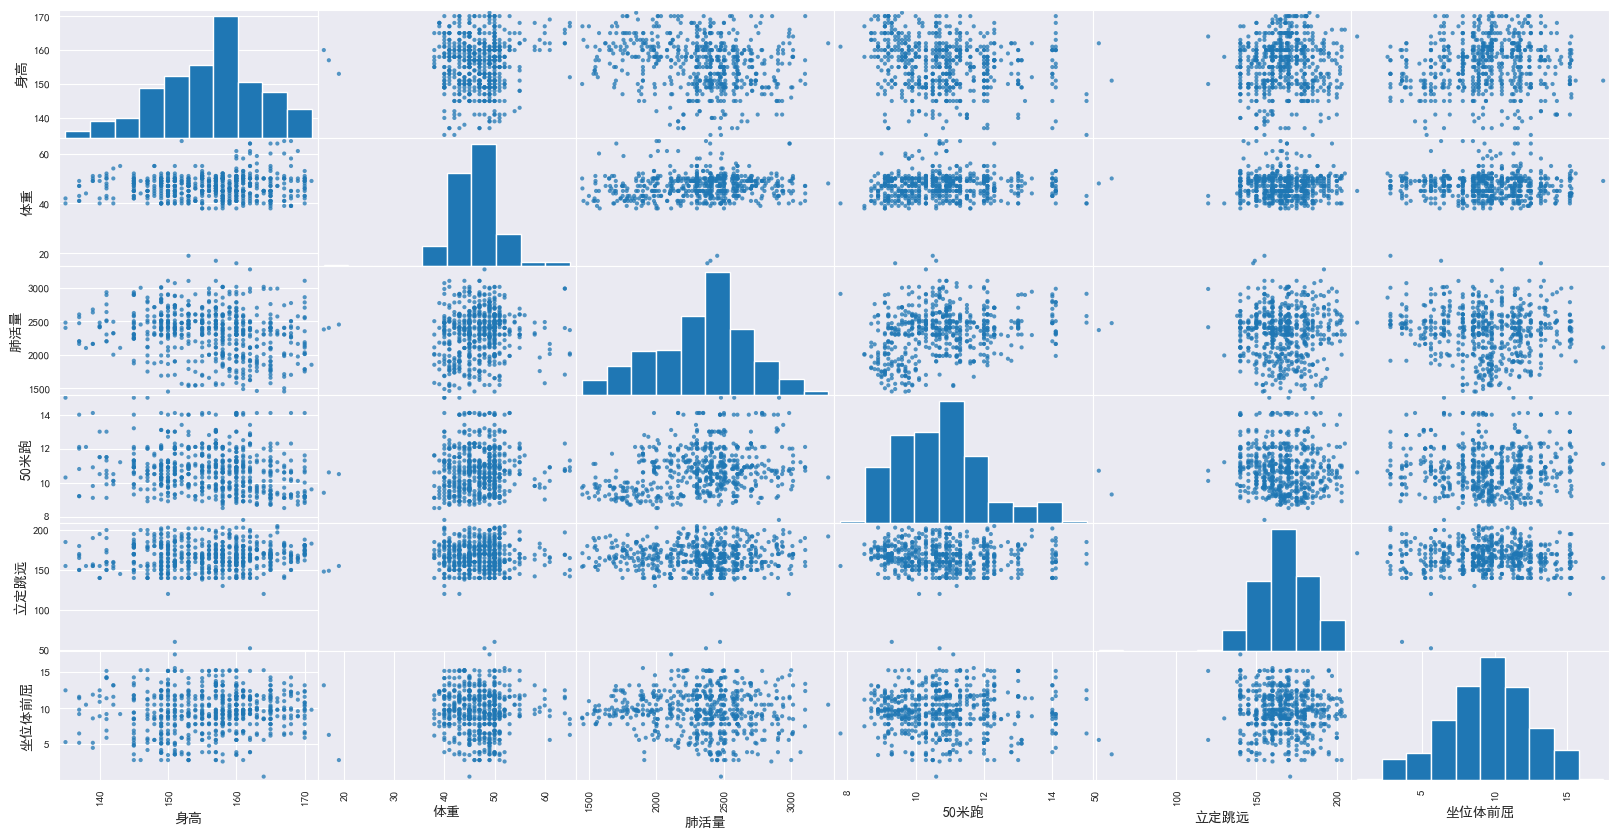

In [19]:
pd.plotting.scatter_matrix(data, figsize=(20,10), alpha=0.75)
plt.show()

#### 相关系数矩阵

![image.png](attachment:f98a87b0-3c5f-4b45-9b8d-83163264c799.png)

In [20]:
cor = data.corr()  # 默认method='pearson'
cor

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,1.000000,0.066531,-0.217663,-0.192002,0.043973,0.095069
体重,0.066531,1.000000,0.095375,0.068540,0.027943,-0.016089
肺活量,-0.217663,0.095375,1.000000,0.289751,0.024827,-0.074931
50米跑,-0.192002,0.068540,0.289751,1.000000,-0.058681,-0.001876
立定跳远,0.043973,0.027943,0.024827,-0.058681,1.000000,-0.017407
坐位体前屈,0.095069,-0.016089,-0.074931,-0.001876,-0.017407,1.000000


In [23]:
import seaborn as sns
sns.set(font='SimHei')  # 支持中文显示

#### 可视化矩阵

<Axes: >

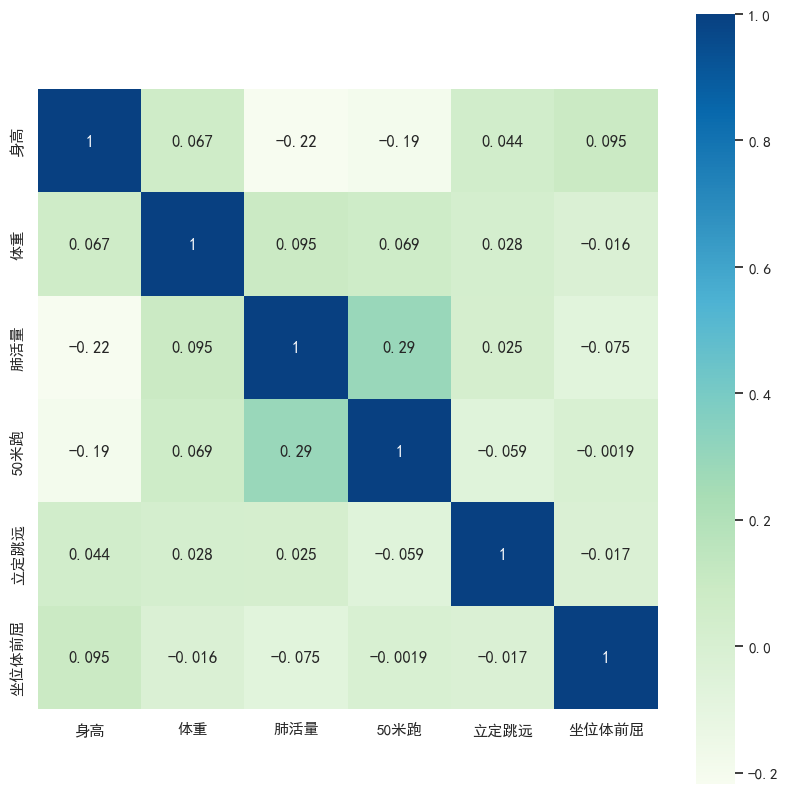

In [24]:
fig, ax = plt.subplots(figsize = (10,10))

# cor：相关系数矩阵
# cmap：颜色
# xticklabels：显示x轴标签
# yticklabels：显示y轴标签
# annot：方块中显示数据
# square：方块为正方形

sns.heatmap(cor, cmap='GnBu', xticklabels=True, yticklabels=True,
            annot=True, square=True)

In [25]:
from scipy import stats
np.set_printoptions(suppress=True)  # 不使用用科学计数法
pd.set_option('display.float_format',lambda x : '%.4f' % x)  # 保留小数点后4位有效数字

In [26]:
# 0.975分位数
tp = stats.t.isf(1-0.975, 28)

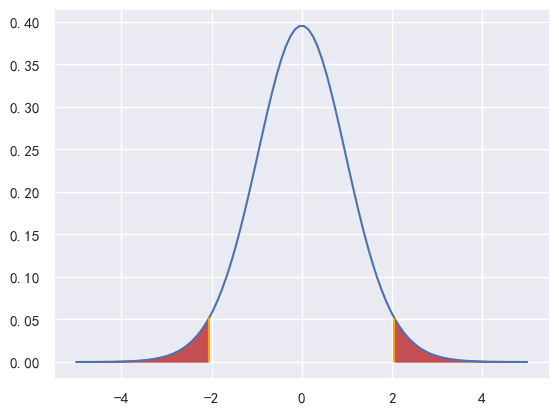

In [27]:
x = np.linspace(-5,5,100)
y = stats.t.pdf(x, 28)
plt.plot(x,y)
plt.vlines(-tp, 0, stats.t.pdf(-tp, 28), colors='orange')
plt.vlines(tp, 0, stats.t.pdf(tp, 28), colors='orange')
plt.fill_between(x, 0, y, where=abs(x)>tp, interpolate=True, color='r')

In [28]:
# 自定义求解p值矩阵的函数
def my_pvalue_pearson(x):
    col = x.shape[1]
    col_name = x.columns.values
    p_val = []
    for i in range(col):
        for j in range(col):
            p_val.append(stats.pearsonr(x[col_name[i]], x[col_name[j]])[1])
    p_val = pd.DataFrame(np.array(p_val).reshape(col, col), columns=col_name, index=col_name)
    p_val.to_csv('p_val_pearson.csv')  # 此处实则为多此一举，目的是借助带有excel格式的数据使得输出更美观
    p_val = pd.read_csv('p_val_pearson.csv', index_col=0)
    return p_val

In [29]:
my_pvalue_pearson(data)

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,0.0000,0.1061,0.0000,0.0000,0.2859,0.0208
体重,0.1061,0.0000,0.0204,0.0960,0.4978,0.6963
肺活量,0.0000,0.0204,0.0000,0.0000,0.5469,0.0687
50米跑,0.0000,0.0960,0.0000,0.0000,0.1542,0.9637
立定跳远,0.2859,0.4978,0.5469,0.1542,0.0000,0.6728
坐位体前屈,0.0208,0.6963,0.0687,0.9637,0.6728,0.0000


### 正态分布检验

#### Jarque-Bera检验（n>30)

In [30]:
x = stats.norm.rvs(2, 3, 10000)
skewness = stats.skew(x)  # 偏度
kurtosis = stats.kurtosis(x)  # 峰度
jbtext = stats.jarque_bera(x)
print('偏度为：',skewness)
print('峰度为：',kurtosis)
print('J-B值：',jbtext[0])
print('p-value:',jbtext[1])

偏度为： -0.0070949112190719504
峰度为： -0.0017065799894400158
J-B值： 0.08510978170267051
p-value: 0.9583378600961744


In [31]:
def my_jbtext(x,a=0.05):
    col_name = x.columns
    col_cnt = x.shape[1]
    h_mat = np.zeros(col_cnt)
    p_mat = np.zeros(col_cnt)
    for i in range(col_cnt):
        p_val = stats.jarque_bera(data[col_name[i]])[1]
        p_mat[i] = p_val
        if p_val >= a:
            h_mat[i] = 0  # 通过原假设
        else:
            h_mat[i] = 1  # 拒绝原假设
#     print(h_mat)
#     print(p_mat)
    df = pd.DataFrame([p_mat,h_mat], columns=col_name, index=['p_value','H'])
    return df

In [32]:
df = my_jbtext(data,0.01)
df

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
p_value,0.0060,0.0000,0.0085,0.0000,0.0000,0.0395
H,1.0000,1.0000,1.0000,1.0000,1.0000,0.0000


#### Shapiro-wilk检验(3<=n<=50)

In [33]:
stats.shapiro(data['身高'])

ShapiroResult(statistic=0.9839151501655579, pvalue=4.204666765872389e-06)

In [34]:
def my_shaptext(x,a=0.05):
    col_name = x.columns.values
    col_cnt = x.shape[1]
    h_mat = np.zeros(col_cnt)
    p_mat = np.zeros(col_cnt)
    for i in range(col_cnt):
        p_val = stats.shapiro(data[col_name[i]])[1]
        p_mat[i] = p_val
        if p_val >= a:
            h_mat[i] = 0  # 通过原假设
        else:
            h_mat[i] = 1  # 拒绝原假设
#     print(h_mat)
#     print(p_mat)
    df = pd.DataFrame([p_mat,h_mat], columns=col_name, index=['p_value','H'])
    return df

In [35]:
my_shaptext(data)

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
p_value,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001
H,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


#### Q-Q图（大样本时使用）

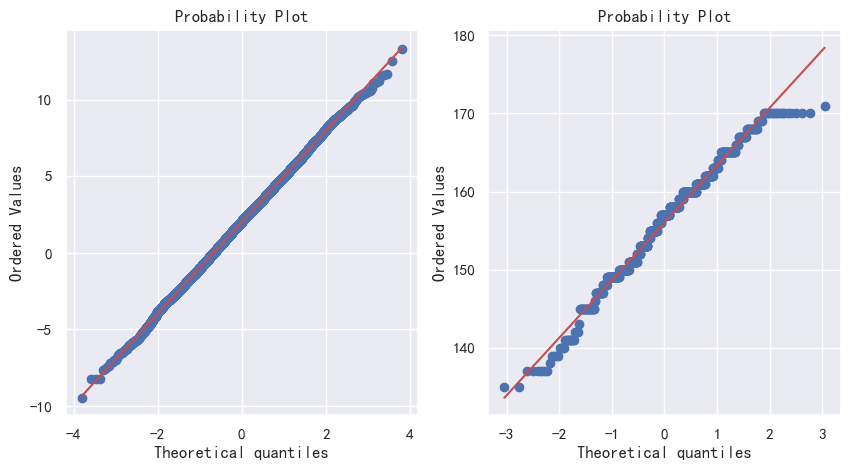

In [36]:
x = stats.norm.rvs(2, 3, 10000)

fig = plt.figure(figsize=(10,5))
fig.add_subplot(1,2,1)
stats.probplot(x, dist="norm", plot=plt)

fig.add_subplot(1,2,2)
stats.probplot(data['身高'], dist="norm", plot=plt)

plt.show()

### 斯皮尔曼相关系数

In [37]:
data.corr(method='spearman')

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,1.0000,0.0301,-0.2430,-0.1990,0.0624,0.1099
体重,0.0301,1.0000,0.1305,0.0898,0.0216,-0.0488
肺活量,-0.2430,0.1305,1.0000,0.2626,0.0219,-0.0801
50米跑,-0.1990,0.0898,0.2626,1.0000,-0.0910,-0.0029
立定跳远,0.0624,0.0216,0.0219,-0.0910,1.0000,-0.0399
坐位体前屈,0.1099,-0.0488,-0.0801,-0.0029,-0.0399,1.0000


斯皮尔曼相关系数的假设检验

In [38]:
# 自定义求解p值矩阵的函数
def my_pvalue_spearman(x):
    col = x.shape[1]
    col_name = x.columns.values
    p_val = []
    for i in range(col):
        for j in range(col):
            p_val.append(stats.spearmanr(x[col_name[i]], x[col_name[j]])[1])
    p_val = pd.DataFrame(np.array(p_val).reshape(col, col), columns=col_name, index=col_name)
    p_val.to_csv('p_val_spearman.csv')  # 此处实则为多此一举，目的是借助带有excel格式的数据使得输出更美观
    p_val = pd.read_csv('p_val_spearman.csv', index_col=0)
    return p_val

In [39]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [40]:
sp_result = my_pvalue_spearman(data)
sp_result

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,0.000,0.465,0.000,0.000,0.129,0.008
体重,0.465,0.000,0.001,0.029,0.600,0.236
肺活量,0.000,0.001,0.000,0.000,0.594,0.052
50米跑,0.000,0.029,0.000,0.000,0.027,0.944
立定跳远,0.129,0.600,0.594,0.027,0.000,0.333
坐位体前屈,0.008,0.236,0.052,0.944,0.333,0.000


In [41]:
def append_sign(x):
    temp = str(round(x,3))
    if x < 0.01:
        return temp + '**'
    elif 0.01 <= x < 0.05:
        return temp + '*'
    else:
        return temp

In [42]:
row = sp_result.shape[1]
sp_signed = sp_result.copy()
for r in range(row):
    sp_signed.iloc[:,r] = sp_result.iloc[:,r].apply(append_sign)

sp_signed

,身高,体重,肺活量,50米跑,立定跳远,坐位体前屈
身高,0.0**,0.465,0.0**,0.0**,0.129,0.008**
体重,0.465,0.0**,0.001**,0.029*,0.6,0.236
肺活量,0.0**,0.001**,0.0**,0.0**,0.594,0.052
50米跑,0.0**,0.029*,0.0**,0.0**,0.027*,0.944
立定跳远,0.129,0.6,0.594,0.027*,0.0**,0.333
坐位体前屈,0.008**,0.236,0.052,0.944,0.333,0.0**


斯皮尔曼相关系数和皮尔逊相关系数的选择：

1.连续数据，正态分布，线性关系，用pearson相关系数是最恰当，当然用spearman相关系数也可以， 就是效率没有pearson相关系数高。

2.上述任一条件不满足，就用spearman相关系数，不能用pearson相关系数。

3.两个定序数据之间也用spearman相关系数，不能用pearson相关系数。

定序数据是指仅仅反映观测对象等级、顺序关系的数据，是由定序尺度计量形成的，表现为类别，可以进行排序，属于品质数据。
例如：优、良、差；

我们可以用1表示差、 2表示良、 3表示优，但请注意，用2除以1得出的2并不

代表任何含义。定序数据最重要的意义代表了一组数据中的某种逻辑顺序。

注：斯皮尔曼相关系数的适用条件比皮尔逊相关系数要广，只要数据满足单调关系

（例如线性函数、指数函数、对数函数等）就能够使用。